In [369]:
%load_ext autoreload
%autoreload 2
import numpy as np
from src.poly_fit import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [370]:
def rf(x,y,c):
    return np.polyval(c[0:4], x) /(1.0+ np.polyval(c[4:], x))-y
def r2(x,y,c):
    r=rf(x,y,c)
    return np.linalg.norm(r)**2


def Dr(x,y,c):
    D=np.zeros([y.size,7])
    D[:,0]=x**3/(1.0+ np.polyval(c[4:], x))
    D[:,1]=x**2/(1.0+ np.polyval(c[4:], x))
    D[:,2]=x/(1.0+ np.polyval(c[4:], x))
    D[:,3]=1/(1.0+ np.polyval(c[4:], x))
    D[:,4]=-x**2/(1.0+ np.polyval(c[4:], x))**2
    D[:,5]=-x/(1.0+ np.polyval(c[4:], x))**2
    D[:,6]=-1/(1.0+ np.polyval(c[4:], x))**2
  
    
    return D

Text(0.5, 1.0, 'original data')

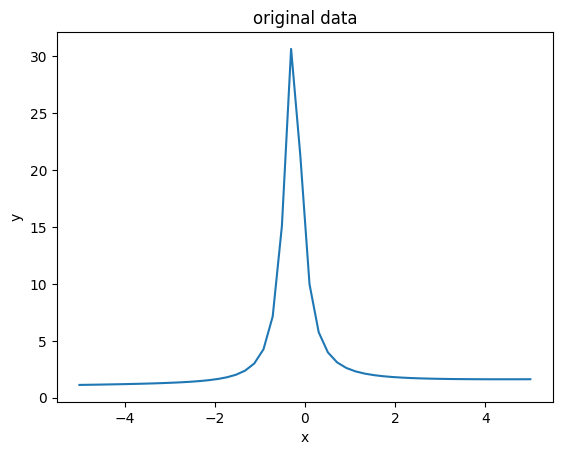

In [371]:
c=np.array([1,32,23,43,24,13,2])
x=np.linspace(-5,5,50)
y= np.polyval(c[0:4], x) / (1+np.polyval(c[4:], x))
# it is equivalent to the following model
# y=(1*x**3+32*x**2+23*x+43)/(1+24*x**2+13*x+2)

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("original data")

In [372]:
# starting guess
c=np.ones(7)*10

i=0
while i<3e4:
    M=Dr(x,y,c)
    r=rf(x,y,c)
    print(c)
    print("r2: ", r2(x,y,c))
    q=np.linalg.solve(M.T@M+1e3*np.diag(np.diag(M.T@M)), M.T@r)
    c=c-q
    c
    if(r2(x,y,c)<np.linalg.norm(r)**2):
        cbest=c
        rbest=r2(x,y,c)
    # print(r2(y,x,c))
    i+=1

[10. 10. 10. 10. 10. 10. 10.]
r2:  2149.684693606955
[ 9.98992185 10.02459254  9.92298999 10.11263795  9.09065692 11.15541584
  8.75745687]
r2:  2240.6897248563077
[ 9.98005475 10.0484881   9.86009928 10.19886561  8.62019617 11.72412218
  8.09762211]
r2:  2307.516812915495
[ 9.97035604 10.07153696  9.80669495 10.26924518  8.3283712  12.06390785
  7.68961492]
r2:  2358.7782796440997
[ 9.96079754 10.09373297  9.76009498 10.32897304  8.12758271 12.2912023
  7.41231444]
r2:  2399.3885748782996
[ 9.95136098 10.1151139   9.71863862 10.38099778  7.97995485 12.45468918
  7.21148926]
r2:  2432.3097531450576
[ 9.94203386 10.13572957  9.68122472 10.42716543  7.86629483 12.57835054
  7.0592705 ]
r2:  2459.452889131818
[ 9.93280715 10.15563095  9.6470831  10.46871438  7.77577303 12.67540311
  6.93987334]
r2:  2482.11875347727
[ 9.92367402 10.17486646  9.61565213 10.50651879  7.70178504 12.75374845
  6.84368793]
r2:  2501.2304587217895
[ 9.91462912 10.19348078  9.58650852 10.54122046  7.64005899 12.

In [373]:
c

array([ 0.68815154, 19.83623463, 13.57125059, 26.3171481 , 14.83979695,
        7.99630217,  0.83992654])

Text(0.5, 1.0, 'res')

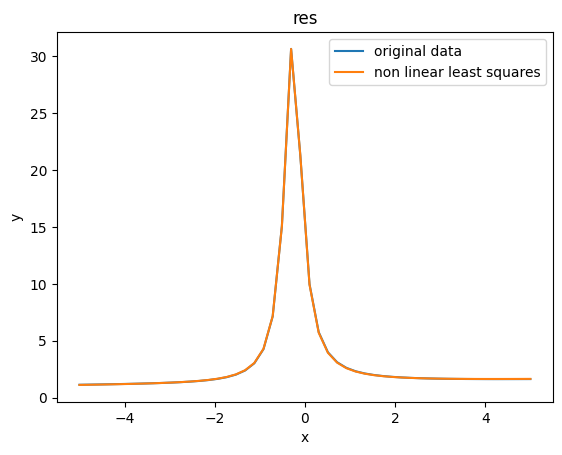

In [374]:
# evaluate at resulting result
y2=np.polyval(c[0:4], x)/ (1+np.polyval(c[4:], x))

plt.plot(x,y, label="original data")
plt.plot(x,y2, label="non linear least squares")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("res")

Test normal cdf

Text(0.5, 1.0, 'original data')

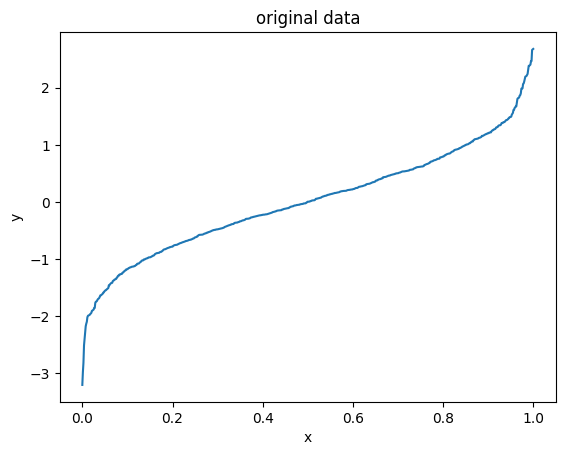

In [226]:
np.random.seed(10)
y=np.random.normal(0,1,800)
y=np.sort(y)
x=cdf_funct(y)
t=x

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("original data")

In [107]:
def rf(x,y,c):
    return np.polyval(c, x) -y

def Dr(x,y,c, order):
    D=np.zeros([y.size,order+1])
    for i in range(order+1):
        D[:,i]=x**(order-i)


    return D

In [61]:
lmbda=50

In [65]:
# t=t[100:700]
# y=y[100:700]

In [66]:
c=np.ones(15)*1

In [296]:
# p=np.ones(5)
i=0
# c=np.ones(7)*1
while True:
    M=Dr(t,y,c)
    r=rf(t,y,c)
    print("r2: ", r2(t,y,c))
    q=np.linalg.solve(M.T@M+1e10*np.diag(np.diag(M.T@M)), M.T@r)
    if (i>1e4):
        # print(abs(r2(t,y,c)-r2(t,y,c+q)))
        break
    c=c-q
    i+=1
print(i)

r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.970107518886833
r2:  8.9701

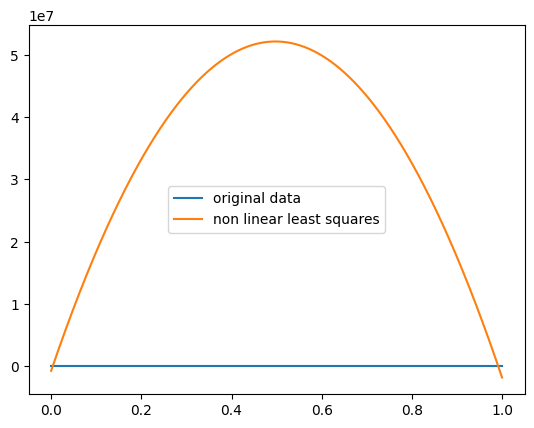

In [290]:
plt.plot(t, y, label="original data")
plt.plot(t, np.polyval(c, t), label="non linear least squares")
plt.legend()


Test cubic polynomial

In [375]:
t=np.linspace(-5,5,50)
y=t**3

In [376]:
def rf(t,y,c):
    return c*t**3-y

def Dr(t,y,c):
    D=np.zeros([y.size,1])
    D[:,0]=t**3

    return D

In [377]:
c=np.array([10])
i=0
while True:
    M=Dr(t,y,c)
    r=rf(t,y,c)
    print("r2: ", r2(t,y,c))
    q=np.linalg.solve(M.T@M+lmbda*np.diag(np.diag(M.T@M)), M.T@r)
    if (i>1000):
        # print(abs(r2(t,y,c)-r2(t,y,c+q)))
        break
    c=c-q
    i+=1
print(i)

r2:  10176629.483066043
r2:  9781458.55734914
r2:  9401632.600297136
r2:  9036555.748074908
r2:  8685655.27496627
r2:  8348380.6948926095
r2:  8024202.897820657
r2:  7712613.319704593
r2:  7413123.144660316
r2:  7125262.5381202595
r2:  6848579.909765723
r2:  6582641.205080471
r2:  6327029.224414138
r2:  6081342.968487254
r2:  5845197.0093110865
r2:  5618220.885535455
r2:  5400058.521275909
r2:  5190367.667508561
r2:  4988819.36515625
r2:  4795097.429023693
r2:  4608897.9517721
r2:  4429928.827155036
r2:  4257909.291767625
r2:  4092569.4845901816
r2:  3933650.0236353152
r2:  3780901.599034328
r2:  3634084.5819245744
r2:  3492968.648524197
r2:  3357332.418804496
r2:  3226963.109193094
r2:  3101656.198763067
r2:  2981215.1083843396
r2:  2865450.8923340444
r2:  2754181.941882011
r2:  2647233.7003864013
r2:  2544438.3894525194
r2:  2445634.7457252196
r2:  2350667.7679019803
r2:  2259388.4735697615
r2:  2171653.6654842
r2:  2087325.706924453
r2:  2006272.3057712927
r2:  1928366.3069697162
r2

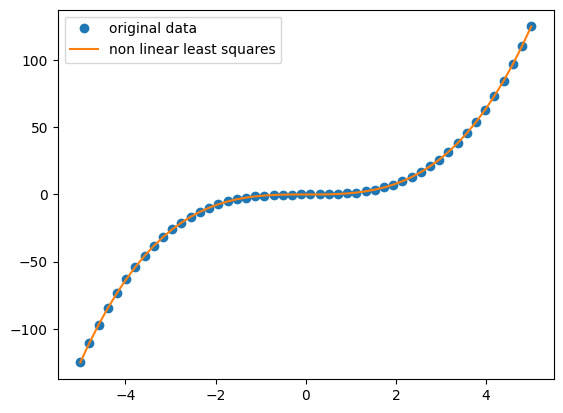

In [378]:
plt.plot(t,y, "o", label="original data")
t_vec=np.linspace(t.min()-1,t.max()+1,100)
plt.plot(t, c*t**3, label="non linear least squares")
plt.legend()

Test exponential functions

In [379]:
t=np.array([1,2,2,3,4])
y=np.array([3,5,7,5,1])

def rf(t,y,c):
    return c[0]*np.exp(-c[1]*(t-c[2])**2)-y

def r2(t,y,c):
    r=rf(t,y,c)
    return np.linalg.norm(r)**2

def Dr(t,y,c):
    D=np.zeros([y.size,3])
    D[:,0]=np.exp(-c[1]*(t-c[2])**2)
    D[:,1]=-c[0]*(t-c[2])**2*np.exp(-c[1]*(t-c[2])**2)
    D[:,2]=2*c[0]*c[1]*(t-c[2])*np.exp(-c[1]*(t-c[2])**2)
    return D

In [380]:
c=np.array([6.3,-0.508,2.249])
c=np.array([1,1,1])
lmbda=50

In [381]:
# p=np.ones(5)
i=0
while True:
    M=Dr(t,y,c)
    r=rf(t,y,c)
    print("r2: ", r2(t,y,c))
    q=np.linalg.solve(M.T@M+lmbda*np.diag(np.diag(M.T@M)), M.T@r)
    if (i>1000):
        # print(abs(r2(t,y,c)-r2(t,y,c+q)))
        break
    c=c-q
    i+=1
print(i)

r2:  95.25849624772098
r2:  87.53761141297957
r2:  79.59774732157175
r2:  72.56835238840725
r2:  67.2575134720954
r2:  63.22303495895628
r2:  59.99230880653462
r2:  57.273278122991705
r2:  54.897870085449014
r2:  52.76840343684205
r2:  50.825885551299294
r2:  49.03288937964399
r2:  47.36439151134303
r2:  45.80277272898498
r2:  44.33500874230665
r2:  42.951041056076704
r2:  41.64280232945765
r2:  40.40361540854693
r2:  39.22781166386069
r2:  38.11048138804257
r2:  37.0473056568354
r2:  36.034439609178285
r2:  35.068428917620714
r2:  34.146148167156454
r2:  33.264754029047346
r2:  32.42164866404611
r2:  31.614450373171604
r2:  30.840969514118402
r2:  30.099188342045572
r2:  29.387243849814144
r2:  28.70341295708236
r2:  28.046099581013387
r2:  27.413823245679865
r2:  26.805208972862268
r2:  26.21897825685522
r2:  25.653940968563578
r2:  25.1089880651162
r2:  24.583085004104074
r2:  24.075265778802375
r2:  23.58462750400515
r2:  23.110325492507982
r2:  22.651568770587584
r2:  22.207615987

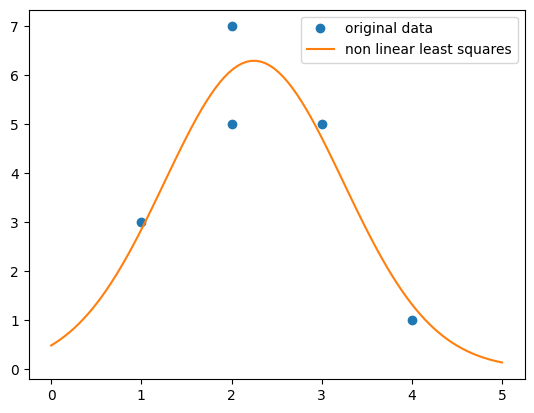

In [382]:
plt.plot(t,y, "o", label="original data")
t_vec=np.linspace(t.min()-1,t.max()+1,100)
plt.plot(t_vec,c[0]*np.exp(-c[1]*(t_vec-c[2])**2), label="non linear least squares")
plt.legend()

Savgol filter

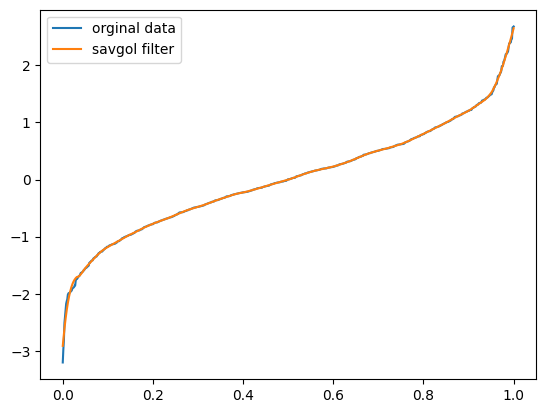

In [21]:
from scipy.signal import savgol_filter
np.random.seed(10)
y=np.random.normal(0,1,800)
y=np.sort(y)
x=cdf_funct(y)

yhat = savgol_filter(y, 51, 3) 
plt.plot(x,y, label="orginal data")
plt.plot(x,yhat, label="savgol filter")
plt.legend()

Logistic model

In [443]:
def rf(x,y,c):
    return c[0]/(1+np.exp(-c[1]*(x-c[2])))-y

def r2(x,y,c):
    r=rf(x,y,c)
    return np.linalg.norm(r)**2

def Dr(x,y,c):
    D=np.zeros([y.size,3])
    D[:,0]=1/(1+np.exp(-c[1]*(x-c[2])))
    D[:,1]=-1/(1+np.exp(-c[1]*(x-c[2])))**2*(-1)*(x-c[2])*np.exp(-c[1]*(x-c[2]))
    D[:,2]=-1/(1+np.exp(-c[1]*(x-c[2])))**2*(-c[1])*(-1)*np.exp(-c[1]*(x-c[2]))
    return D

Text(0.5, 1.0, 'original data')

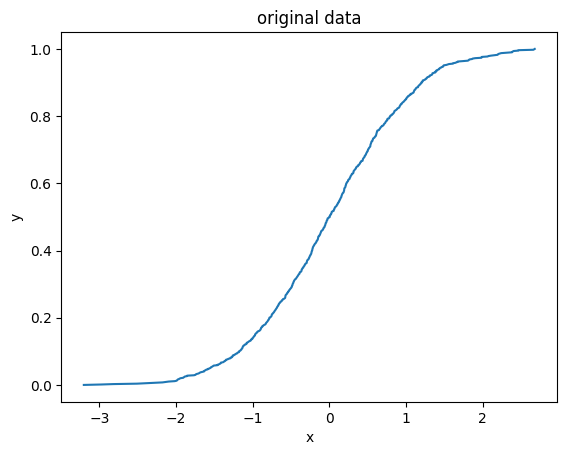

In [468]:
np.random.seed(10)
x=np.random.normal(0,1,800)
x=np.sort(x)
y=cdf_funct(x)
t=x

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("original data")

In [470]:
i=0
c=np.ones(3)
while True:
    M=Dr(t,y,c)
    r=rf(t,y,c)
    print("r2: ", r2(t,y,c))
    q=np.linalg.solve(M.T@M+1e1*np.diag(np.diag(M.T@M)), M.T@r)
    if (i>1000):
        # print(abs(r2(t,y,c)-r2(t,y,c+q)))
        break
    c=c-q
    i+=1
print(i)

r2:  44.5311411860507
r2:  31.024102571744113
r2:  22.204244550667234
r2:  16.359719287465463
r2:  12.40172294190433
r2:  9.65480134575993
r2:  7.701664682960408
r2:  6.28207107293303
r2:  5.230674157961908
r2:  4.439833081202755
r2:  3.837547493495268
r2:  3.374317958060952
r2:  3.0152242594458762
r2:  2.735059477743285
r2:  2.5152706795068442
r2:  2.341984133242721
r2:  2.204694571301692
r2:  2.0953706379365427
r2:  2.007828033151241
r2:  1.93727963282576
r2:  1.8800058930241332
r2:  1.8331092100278599
r2:  1.7943283242463814
r2:  1.7618965914481262
r2:  1.7344328809172425
r2:  1.7108570931975107
r2:  1.690324465845704
r2:  1.672174339838867
r2:  1.655890126086901
r2:  1.6410679856614157
r2:  1.6273923103320374
r2:  1.6146165210155652
r2:  1.6025480301505126
r2:  1.591036466695609
r2:  1.5799644582828363
r2:  1.5692404176075994
r2:  1.5587928993952518
r2:  1.548566187725474
r2:  1.5385168468130366
r2:  1.5286110259111876
r2:  1.5188223542168229
r2:  1.509130297163236
r2:  1.499518873

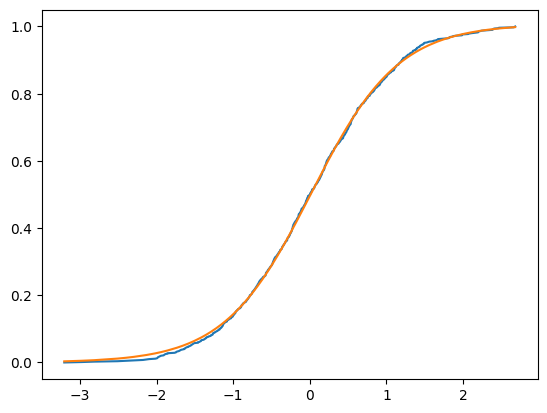

In [471]:
plt.plot(x,y,label="original data")
plt.plot(x,c[0]/(1+np.exp(-c[1]*(x-c[2]))), label="non linear least squares")

New test

In [2457]:
def rf(x,y,c):
    return c[0]*np.log(10+c[1]*x+c[2]+c[5]*x**2+c[6]*x**3) +c[3]*np.exp(c[4]*x)-y

def r2(x,y,c):
    r=rf(x,y,c)
    return np.linalg.norm(r)**2

def Dr(x,y,c):
    D=np.zeros([y.size,7])
    D[:,0]=np.log(10+c[1]*x+c[2]+c[5]*x**2+c[6]*x**3)
    D[:,1]=c[0]/(10+c[1]*x+c[2]+c[5]*x**2+c[6]*x**3)*x
    D[:,2]=c[0]/(10+c[1]*x+c[2]+c[5]*x**2+c[6]*x**3)
    D[:,3]=np.exp(c[4]*x)
    D[:,4]=c[3]*np.exp(c[4]*x)*x
    D[:,5]=c[0]/(10+c[1]*x+c[2]+c[5]*x**2+c[6]*x**3)*x**2
    D[:,6]=c[0]/(10+c[1]*x+c[2]+c[5]*x**2+c[6]*x**3)*x**3
    return D

Text(0.5, 1.0, 'original data')

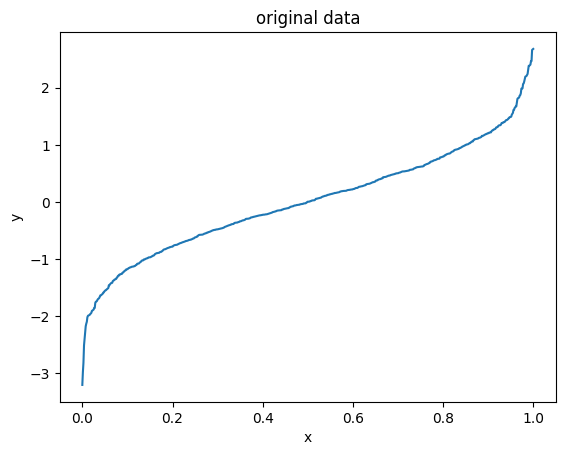

In [2458]:
np.random.seed(10)
y=np.random.normal(0,1,800)
y=np.sort(y)
x=cdf_funct(y)
t=x

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("original data")

In [2508]:
i=0
# c=np.ones(7)
while True:
    M=Dr(t,y,c)
    r=rf(t,y,c)
    print("r2: ", r2(t,y,c))
    q=np.linalg.solve(M.T@M+1e-2*np.diag(np.diag(M.T@M)), M.T@r)
    if (i>1000):
        # print(abs(r2(t,y,c)-r2(t,y,c+q)))
        break
    c=c-q
    i+=1
print(i)

r2:  1.3576801164291186
r2:  1.357680116429103
r2:  1.3576801164291201
r2:  1.3576801164291479
r2:  1.3576801164291035
r2:  1.3576801164291232
r2:  1.3576801164291186
r2:  1.3576801164291303
r2:  1.357680116429093
r2:  1.35768011642913
r2:  1.3576801164291439
r2:  1.3576801164291024
r2:  1.3576801164291314
r2:  1.3576801164291206
r2:  1.3576801164291123
r2:  1.3576801164291046
r2:  1.3576801164291268
r2:  1.357680116429114
r2:  1.3576801164291237
r2:  1.3576801164291175
r2:  1.357680116429105
r2:  1.3576801164291366
r2:  1.3576801164290833
r2:  1.3576801164291015
r2:  1.3576801164291206
r2:  1.3576801164290973
r2:  1.357680116429135
r2:  1.3576801164291132
r2:  1.3576801164291081
r2:  1.3576801164291195
r2:  1.3576801164291004
r2:  1.3576801164291288
r2:  1.357680116429135
r2:  1.3576801164291112
r2:  1.3576801164291283
r2:  1.3576801164291392
r2:  1.3576801164291024
r2:  1.357680116429135
r2:  1.3576801164290984
r2:  1.3576801164291232
r2:  1.3576801164291323
r2:  1.357680116429118
r2

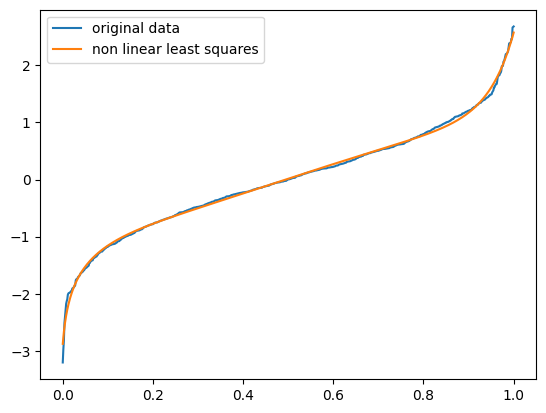

In [2509]:
plt.plot(x, y, label="original data")
plt.plot(x, c[0]*np.log(10+c[1]*x+c[2]+c[5]*x**2+c[6]*x**3) +c[3]*np.exp(c[4]*x), label="non linear least squares")
plt.legend()
